# Visualization

- The primary goal of visualization is to make very pretty, publication-quality figures
    - Or, _alternatively_, to facilitate understanding of data
- Understanding can be achieved in many ways, so it's helpful to have a range of different tools
- An optimal visualization environment is both efficient and flexible

    - Produce off-the-shelf high-quality plots very quickly
    - With more effort, gives you full control over the plot

### Visualization in Python

- Python provides a wide array of options
- Low-level and high-level plotting APIs
- Static images vs. HTML output vs. interactive plots
- Domain-general and domain-specific packages

**ps. many pieces of this notebook have beens scavenged from other visualization notebooks.**

First things, first, with most things in Python, we first load the relevant packages. Here we load three important packages:

- [Matplotlib](https://matplotlib.org/)
- [Pandas](http://pandas.pydata.org/)
- [Seaborn](http://seaborn.pydata.org/)

We will talk about each one as we go along.

The first line in the following cell is specific to Jupyter notebooks. It tells the interpreter to capture figures and embed them in the browser. Otherwise they would end up almost in digital ether.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import numpy as np

For example purposes, we will make use of a phenotypic dataset from the [ABIDE II](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html) consortium. This multi-site dataset contains data from individuals diagnosed with Autism Spectrum Disorder (ASD) and healthy controls. We will first load the data from a single site.

Let's read this from the Web using Pandas. We explicitly specific that missing values are noted in the dataset as `'n/a'`.

In [2]:
df = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-KKI_1/participants.tsv',
                  na_values=['n/a'])

In the following cell we remove all columns that have missing values.

In [3]:
sub_df = df.dropna(axis=1)
sub_df.head()

,site_id,participant_id,dx_group,age_at_scan,sex,handedness_category,handedness_scores,viq,piq,viq_test_type,piq_test_type,nonasd_psydx_icd9code,nonasd_psydx_label,eye_status_at_scan
0,ABIDEII-KKI_1,29273,1,8.476712,1,1.0,82.0,142.0,104.0,WISC-IV,WISC-IV,314.01,ADHD combined,1.0
1,ABIDEII-KKI_1,29274,1,9.246575,1,1.0,83.0,104.0,79.0,WISC-IV,WISC-IV,296.3,MDD (past),1.0
2,ABIDEII-KKI_1,29275,1,8.646575,1,1.0,100.0,130.0,121.0,WISC-IV,WISC-IV,313.81,ODD,1.0
3,ABIDEII-KKI_1,29276,1,9.216438,2,1.0,100.0,128.0,115.0,WISC-IV,WISC-IV,314.01; 300.29,ADHD combined; simple phobia,1.0
4,ABIDEII-KKI_1,29277,1,12.789041,1,1.0,90.0,132.0,123.0,WISC-IV,WISC-IV,314.01,ADHD hyperactive/impulsive,1.0


Using the `keys` method we can look at all the column headings that are left

In [4]:
list(sub_df.keys())

['site_id',
 'participant_id',
 'dx_group',
 'age_at_scan ',
 'sex',
 'handedness_category',
 'handedness_scores',
 'viq',
 'piq',
 'viq_test_type',
 'piq_test_type',
 'nonasd_psydx_icd9code',
 'nonasd_psydx_label',
 'eye_status_at_scan']

## Exercise 1:

Load the following two datasets into two different variables (`df_ohsu` and `df_nyu`), containing only columns with no missing values, and then use the head command display each one.

1. https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-OHSU_1/participants.tsv
2. https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-NYU_1/participants.tsv

In [5]:
df_ohsu = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-OHSU_1/participants.tsv',
                        na_values=['n/a']).dropna(axis=1)
df_nyu = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-NYU_1/participants.tsv',
                        na_values=['n/a']).dropna(axis=1)

In [6]:
df_ohsu.head()

,site_id,participant_id,dx_group,age_at_scan,sex,handedness_category,handedness_scores,fiq,fiq_test_type,current_med_status,current_medication_name,eye_status_at_scan
0,ABIDEII-OHSU_1,28920,1,14.0,1,3.0,12.5,114.0,WISC-IV,0.0,none,1.0
1,ABIDEII-OHSU_1,28924,1,12.0,1,1.0,100.0,122.0,WISC-IV,1.0,amphetamine and dextroamphetamine mixed salt e...,1.0
2,ABIDEII-OHSU_1,28925,1,9.0,1,1.0,87.5,121.0,WISC-IV,0.0,none,1.0
3,ABIDEII-OHSU_1,28926,1,11.0,1,1.0,100.0,110.0,WISC-IV,0.0,none,1.0
4,ABIDEII-OHSU_1,28927,1,13.0,1,1.0,100.0,84.0,WISC-IV,0.0,none,1.0


In [7]:
df_nyu.head()

,site_id,participant_id,dx_group,pdd_dsm_iv_tr,age_at_scan,sex,piq,piq_test_type,nonasd_psydx_icd9code,nonasd_psydx_label,current_med_status,current_medication_name
0,ABIDEII-NYU_1,29177,1,3.0,10.00,2,67.0,WASI,314,ADHD inattentive,1.0,atomoxetine
1,ABIDEII-NYU_1,29178,1,3.0,13.63,1,99.0,WASI,0,none,1.0,amphetamine and dextroamphetamine
2,ABIDEII-NYU_1,29179,1,3.0,7.25,1,89.0,WASI,0,none,0.0,none
3,ABIDEII-NYU_1,29180,1,1.0,6.55,1,84.0,WASI,0,none,0.0,none
4,ABIDEII-NYU_1,29181,1,1.0,8.30,1,132.0,WASI,314,ADHD inattentive,0.0,none


In [8]:
# Load and filter the data

In [9]:
# Display df_ohsu

In [10]:
# Display df_nyu

We will come back to these two datasets later. First, we focus on the original dataset (`sub_df`) to see how we can visualize the information.

We start with matplotlib.

## Matplotlib

- The most widely-used Python plotting library
- Initially modeled on MATLAB's plotting system
- Designed to provide complete control over a plot

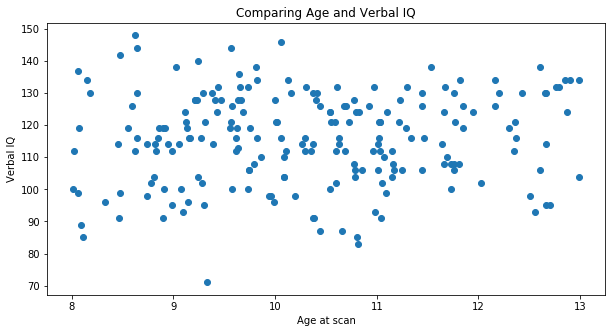

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['age_at_scan '], sub_df.viq)
plt.xlabel('Age at scan')
plt.ylabel('Verbal IQ')
plt.title('Comparing Age and Verbal IQ');

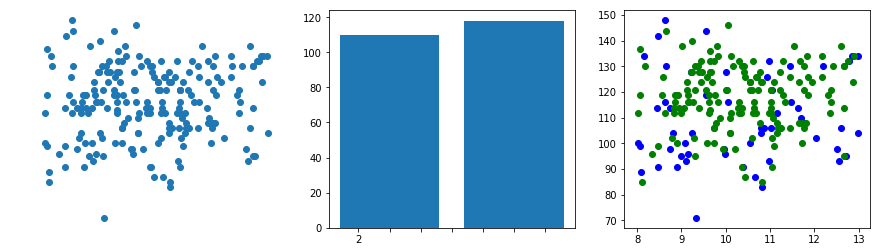

In [12]:
# Set up a figure with 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot in top left
axes[0].scatter(sub_df['age_at_scan '], sub_df['viq'])
axes[0].axis('off')

# Mean species petal widths in top right
means = sub_df.groupby('dx_group')['viq'].mean()
axes[1].bar(np.arange(len(means))+1, means)

# Note how **broken** this is without additional code
axes[1].set_xticklabels(means.index)

# More scatter plots, breaking up by species
colors = ['blue', 'green', 'red']
for i, (s, grp) in enumerate(sub_df.groupby('dx_group')):
    axes[2].scatter(grp['age_at_scan '], grp['viq'], c=colors[i])

## Exercise 2: 

Create a figure with a single axes and replot the scatterplot on the right to group by `sex` instead of `dx_group`. 
- Set the figure size to a ratio of 8 (wide) x 5 (height)
- Use the colors `red` and `gray`
- Set the opacity of the points to 0.5
- Label the axes
- Add a legend

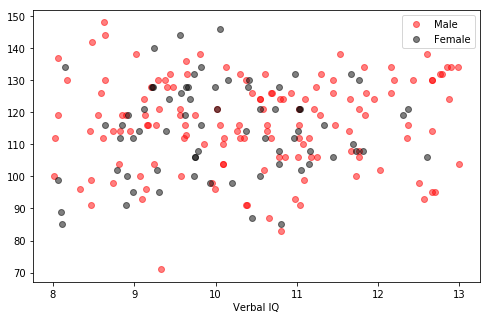

In [13]:
# More scatter plots, breaking up by species
plt.figure(figsize=(8, 5))
colors = ['red', 'black']
for i, (s, grp) in enumerate(sub_df.groupby('sex')):
    plt.scatter(grp['age_at_scan '], grp['viq'], c=colors[i], alpha=0.5)
plt.xlabel('Age at scan')
plt.xlabel('Verbal IQ')
plt.legend(['Male', 'Female']);

In [14]:
# Create solution here

#### You can reuse code directly from the matplotlib gallery.

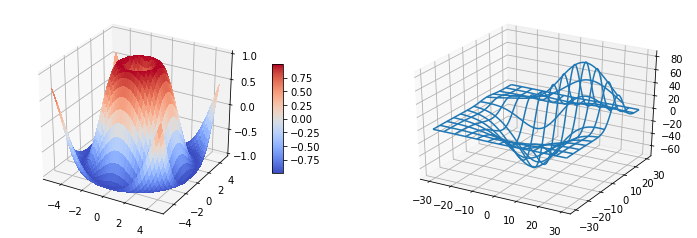

In [15]:
# Demo taken from http://matplotlib.org/examples/mplot3d/subplot3d_demo.html

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt


# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.33))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);

## Matplotlib: pros
* Provides low-level control over virtually every element of a plot
* Completely object-oriented API; plot components can be easily modified
* Close integration with numpy
* Extremely active community
* Tons of functionality (figure compositing, layering, annotation, coordinate transformations, color mapping, etc.)

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb) 

## Matplotlib: cons
* Steep learning curve
* API is extremely unpredictable -- redundancy and inconsistency are common
    * Some simple things are hard; some complex things are easy
* Lacks systematicity/organizing syntax--every plot is its own little world
* Simple plots often require a lot of code
* Default styles are kind of ugly
* The documentation... *why*?

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb) 

# High-level interfaces to matplotlib
* Matplotlib is very powerful and very robust, but the API is hit-and-miss
* Many high-level interfaces to matplotlib have been written
    * Abstract away many of the annoying details
    * The best of both worlds: easy generation of plots, but retain MPL's power
* [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html), [ggplot](http://ggplot.yhathq.com/), pandas, etc.
* Many domain-specific visualization tools are built on MPL (e.g., [nilearn](http://nilearn.github.io/plotting/index.html) in neuroimaging)

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb) 

# Seaborn

Seaborn abstracts away many of the complexities to deal with such minutiae and provides a high level API for creating aesthetic plots. 

* Arguably the premier MPL interface for high-level plots
* Generates beautiful plots in very little code
    * Beautiful styles and color palettes
* Wide range of supported plots
* Modest support for structured plotting (via grids)
* Exceptional [documentation](https://stanford.edu/~mwaskom/software/seaborn/index.html)
* Generally the best place to start when exploring data
* Can be quite slow (e.g., with permutation)

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb)

For example, the following command auto adjusts the setting for the figure to reflect what you are using the figure for.

In [16]:
# Adjust the context of the plot
sns.set_context('poster') # http://seaborn.pydata.org/tutorial/aesthetics.html#scaling-plot-elements
sns.set_palette('pastel') # http://seaborn.pydata.org/tutorial/color_palettes.html

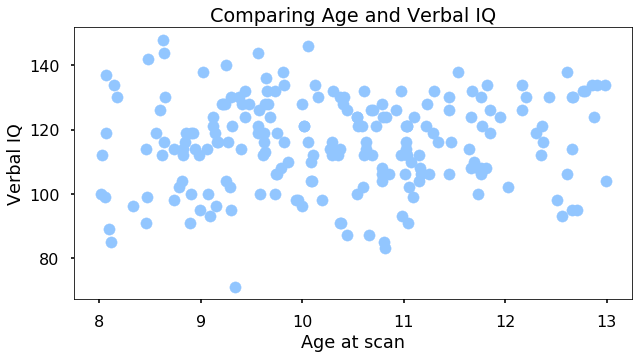

In [17]:
# But still use matplotlib to do the plotting

plt.figure(figsize=(10, 5))
plt.scatter(sub_df['age_at_scan '], sub_df.viq)
plt.xlabel('Age at scan')
plt.ylabel('Verbal IQ')
plt.title('Comparing Age and Verbal IQ');

## Exercise: 3: Compare the figure above to the previous figure. What is different?

- The font size of each label
- The size of the points
- The color palette

Now let's redo the scatter plot in seaborn style.

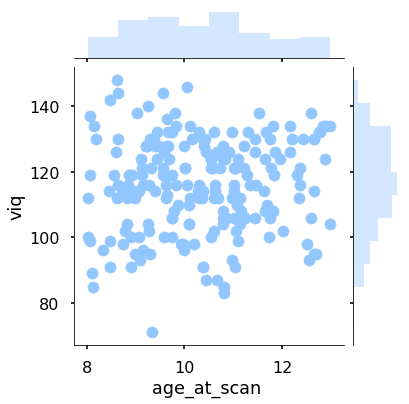

In [18]:
sns.jointplot(x='age_at_scan ', y='viq', data=sub_df, stat_func=None);

## Exercise 4: 

Given the dataset we are using, what would you change to provide a better understanding of the data.

Information about:

- Diagnosis
- Sex

should be encoded separately.

One way to do this with seaborn is to use a more general interface called the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid).

Let's replot the figure while learning about a few new commands.

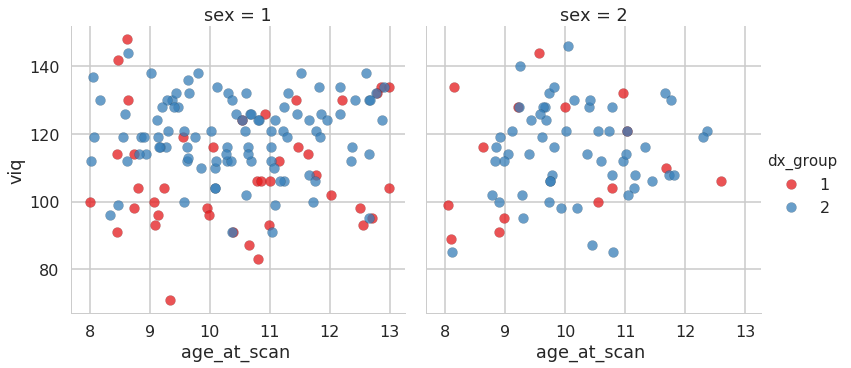

In [19]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('poster')

kws = dict(s=100, alpha=0.75, linewidth=0.15, edgecolor="k")

g = sns.FacetGrid(sub_df, col="sex", hue="dx_group", palette="Set1",
                  hue_order=[1, 2], size=5.5)
g = (g.map(plt.scatter, "age_at_scan ", "viq", **kws).add_legend())

With just a few lines of code, note how much control you have over the figure.

## Exercise 5:

Using a [pairwise plot](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot), compare the distributions of `age`, `viq`, and `piq` with respect to `dx_group`.

- Set a palette
- Set style to `ticks`
- Suppress the `dx_group` variable from being on the plot

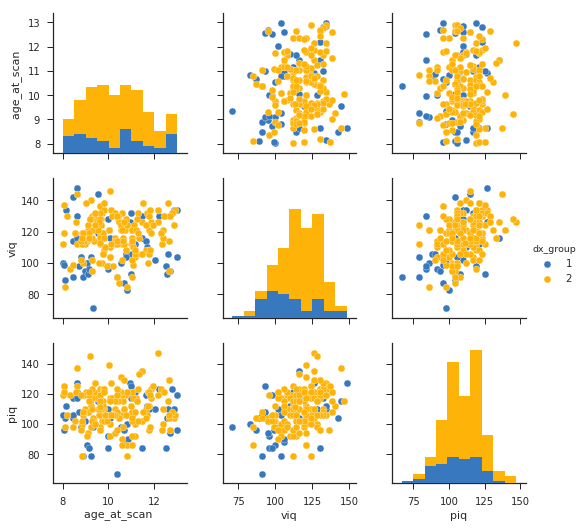

In [20]:
sns.set_context('poster')
sns.set(style="ticks")
sns.set_palette(sns.xkcd_palette(["windows blue", "amber"]))
sns.pairplot(df[['age_at_scan ', 'viq', 'piq', 'dx_group']], vars=['age_at_scan ', 'viq', 'piq'], hue="dx_group");

In [21]:
# Create solution here

## Exercise 6:

Using a [violin plot](http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) separate out `viq` as a function of `sex` and `dx_group`.

- Different `dx_group` should be on each half of each violin
- The x-axis should reflect the different `sex` categories.

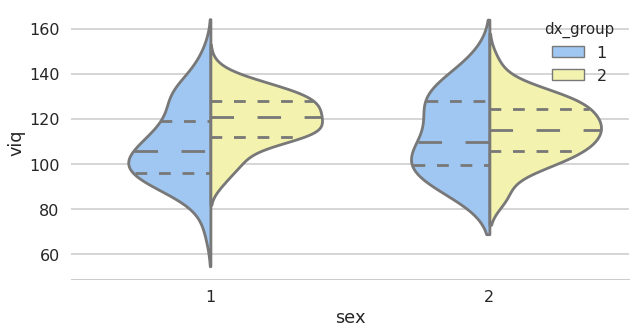

In [22]:
# Draw a nested violinplot and split the violins for easier comparison
sns.set(style="whitegrid", palette="pastel", color_codes=True, rc={"figure.figsize": (10, 5)})
sns.set_context('poster')
sns.violinplot(x="sex", y="viq", hue="dx_group", data=sub_df, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)

In [23]:
# Create solution here

# Altair
* "A declarative statistical visualization library for Python"
* Similar philosophy to ggplot2, in that it's based on a generative syntax
* Altair itself doesn't do any plotting
    * Produces a Vega-Lite JSON specification
    * Completely portable
* Looks very promising, but still in early stages of development

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb)

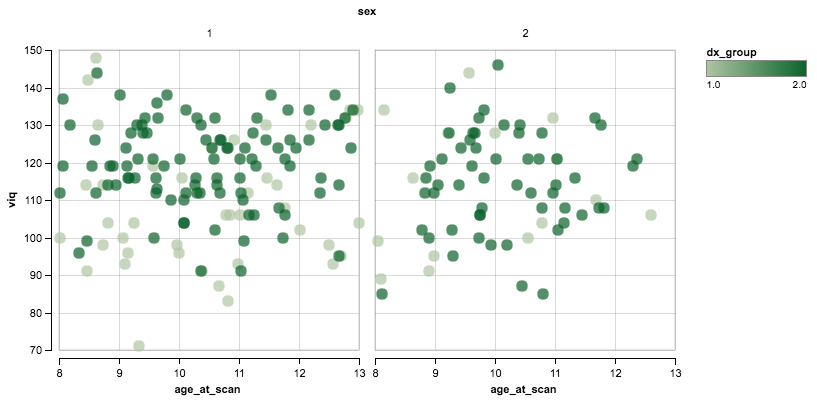

In [27]:
from altair import Chart, X, Y, Scale, Color

Chart(sub_df).mark_circle(opacity=0.7, size=100).encode(
    column='sex',
    x=X('age_at_scan ',
        scale=Scale(
            zero=False,
        )),
    y=Y('viq',
        scale=Scale(
            zero=False,
        )),
    color='dx_group',
).configure_cell(
    height=300.0,
    width=300.0,
)

## Exercise 7:

Use the Altair gallery to perform a binned scatterplot of age and IQ.

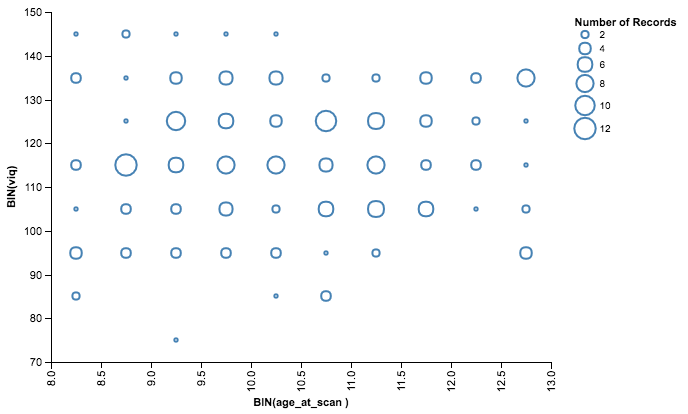

In [25]:
from altair import Bin

Chart(sub_df).mark_point().encode(
    size='count(*):Q',
    x=X('age_at_scan :Q',
        bin=Bin(
            maxbins=10.0,
        ),
    ),
    y=Y('viq:Q',
        bin=Bin(
            maxbins=10.0,
        ),
    ),
)

In [26]:
# Create solution here